In [8]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

df1 = pd.read_csv('data.csv')

df1.head(5)

#len(df1)

,p,y,t,fip_title,c,q,res
0,F1,2021,MD,ACTRIS_ARES_FIP_2021,ACTRIS-ARES,F1-MD,Handle_System
1,F1,2021,MD,ACTRIS_ARES_FIP_2021,ACTRIS-ARES,F1-MD,DOI
2,F1,2021,MD,ACTRIS_ARES_FIP_2021,ACTRIS-ARES,F1-MD,ORCID
3,F1,2020,MD,ACTRIS-ASC_FIP_2020,ACTRIS-ASC,F1-MD,UUID
4,F1,2020,MD,ACTRIS-ASC_FIP_2020,ACTRIS-ASC,F1-MD,DOI


In [10]:
df1.drop((df1[df1.c == 'ACTRIS-ARES'].index) | 
         (df1[df1.c == 'EPOS-ERIC'].index) | 
         (df1[df1.c == 'EPOS-ERIC'].index) |
         (df1[df1.c == 'DiSSCo'].index), inplace=True)

len(df1)

/tmp/ipykernel_3603/3644622852.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df1.drop((df1[df1.c == 'ACTRIS-ARES'].index) |


1736

In [13]:
df1[(df1['p'] == 'F1') & (df1['y'] == '2019')]['res'].value_counts()

DOI              21
Handle_System     6
UUID              5
ePIC              3
URI               3
SDN_CDI_PID       1
B2HANDLE          1
DEIMS-ID          1
Name: res, dtype: int64

In [14]:
df1[(df1['p'] == 'F1') & (df1['y'] == '2021')]['res'].value_counts()

DOI              27
Handle_System     9
UUID              6
ePIC              6
URI               3
ORCID             2
SDN_CDI_PID       1
PURL              1
B2HANDLE          1
DEIMS-ID          1
Name: res, dtype: int64

In [15]:
# Exclude those that were not evaluated in 2019: ACTRIS-ARES, EPOS-ERIC, EPOS-ERIC, DiSSCo
df1.drop((df1[df1.c == 'ACTRIS-ARES'].index) | 
         (df1[df1.c == 'EPOS-ERIC'].index) | 
         (df1[df1.c == 'EPOS-ERIC'].index) |
         (df1[df1.c == 'DiSSCo'].index), inplace=True)

len(df1)

/tmp/ipykernel_3603/2280282678.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df1.drop((df1[df1.c == 'ACTRIS-ARES'].index) |


1736

In [16]:
d = []

principles = ['F1', 'F2', 'F3', 'F4', 'A1.1', 'A1.2', 'A2', 'I1', 'I2', 'I3', 'R1.1', 'R1.2']
years = ['2019', '2020', '2021']

for year in years:
    d1 = {}
    d.append(d1)
    resources = Series(dtype='float64')
    for principle in principles:
        selection = df1[(df1['p'] == principle) & (df1['y'] == year)]['res']
        #print('{} {} {}'.format(year, principle, len(selection)))
        resources = pd.concat([resources, selection])
        
        # Option 1
        #unique = len(set(selection)) # Number of distinct resources in current use in communities for the given year and principle
        #total = len(selection) # Number of resources in current use communities for the given year and principle
        #fraction = unique/total if total > 0 else 0
        # 5/5 means that all communities use different resources
        # 1/10 means that all communities use the same resource
        # The lower the fraction the better
        #print('{} {} {} {} {}'.format(year, principle, unique, total, fraction))
        
        # Option 2
        selection = selection.value_counts()
        shared = len(selection[selection > 1])
        total = len(selection)
        fraction = shared/total if total > 0 else 0
        
        d1[principle] = fraction
        
    # Option 1
    unique = len(set(resources))
    total = len(resources)
    fraction = unique/total if total > 0 else 0
    
    # Option 2
    selection = resources.value_counts()
    shared = len(selection[selection > 1])
    total = len(selection)
    fraction = shared/total if total > 0 else 0
    
    d1['R1.3'] = fraction
        

df2 = pd.DataFrame(d)
df2.index = years

In [17]:
df3 = df2.T
#df3.head(3)
df3

,2019,2020,2021
F1,0.625000,0.555556,0.600000
F2,0.461538,0.466667,0.444444
F3,0.400000,0.400000,0.400000
F4,0.625000,0.592593,0.558824
A1.1,0.470588,0.666667,0.722222
A1.2,0.545455,0.615385,0.769231
A2,0.000000,0.000000,0.125000
I1,0.666667,0.777778,0.888889
I2,0.458333,0.689655,0.678571
I3,0.370370,0.310345,0.428571


In [18]:
diff = []

# A negative difference means that there has been convergence along the principle
for index, row in df3.iterrows():
    diff.append(row['2021']-row['2019'])

df3['Difference'] = diff

df3.sort_values(by='Difference', ascending=True)

,2019,2020,2021,Difference
R1.1,0.454545,0.416667,0.300000,-0.154545
F4,0.625000,0.592593,0.558824,-0.066176
F1,0.625000,0.555556,0.600000,-0.025000
F2,0.461538,0.466667,0.444444,-0.017094
F3,0.400000,0.400000,0.400000,0.000000
I3,0.370370,0.310345,0.428571,0.058201
R1.3,0.522388,0.605442,0.597484,0.075096
A2,0.000000,0.000000,0.125000,0.125000
R1.2,0.500000,0.666667,0.625000,0.125000
I2,0.458333,0.689655,0.678571,0.220238


In [19]:
df1[(df1['p'] == 'F1') & (df1['y'] == '2019')]['res'].value_counts()

DOI              21
Handle_System     6
UUID              5
ePIC              3
URI               3
SDN_CDI_PID       1
B2HANDLE          1
DEIMS-ID          1
Name: res, dtype: int64

In [20]:
df1[(df1['p'] == 'F1') & (df1['y'] == '2021')]['res'].value_counts()

DOI              27
Handle_System     9
UUID              6
ePIC              6
URI               3
ORCID             2
SDN_CDI_PID       1
PURL              1
B2HANDLE          1
DEIMS-ID          1
Name: res, dtype: int64

In [25]:
# Good examples: F4, I1
principle = 'I1'

y1 = df1[(df1['p'] == principle) & (df1['y'] == '2019')]['res'].value_counts()
y2 = df1[(df1['p'] == principle) & (df1['y'] == '2021')]['res'].value_counts()

df4 = pd.DataFrame({'2019': y1, '2021': y2}, dtype='int64')

df4 = df4.dropna()

# Drop those that have same counts in 2019 and 2021
df4 = df4[df4['2019'] != df4['2021']]

df4 = df4.sort_values(by='2021', ascending=False)

df4.head(5)

,2019,2021
NetCDF,10,14
RDFS,10,12
JSON-LD,1,2
ODV_ASCII,1,2


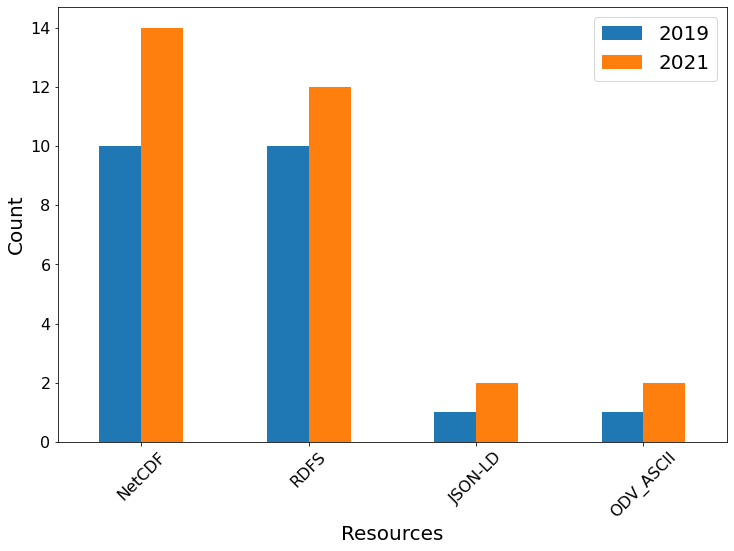

In [26]:
ax = df4.plot.bar(figsize=(12,8))
plt.legend(fontsize=20)
plt.xlabel('Resources', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()